<a href="https://colab.research.google.com/github/Nai5lf/Projects/blob/main/Clustering_the_Boston_marathon(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

---

### I will be examining a 2014 Boston marathon dataset consisting of 31,984 individual runners. The dataset contains runners information such as gender, age, city, state, different stages finishing times among other variables. The study aims to find the best performing clustering algorithm with this dataset.

# **2. Exploratory data analysis**

---

## **2.1 Imports and Dataframe Load**

In [ ]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Creating a dataframe
results_2014 = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")

In [ ]:
# Observations & variables
results_2014.info()
results_2014.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  object 
 4   gender     31984 non-null  object 
 5   age        31984 non-null  int64  
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31984 non-null  object 
 11  overall    31984 non-null  int64  
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31984 non-null  object 
 15  5k         31984 non-null  object 
 16  half       31984 non-null  object 
 17  20k        31984 non-null  object 
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [ ]:
results_2014.tail(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
31974,76.45,"Foley, Alison M.",6973,-,F,29,431.73,35903,14339,NaN,337.42,31887,15.52,MA,279.47,35.63,183.28,166.43,USA,Wellesley,-
31975,75.80,"Casey, Patrick A. Jr.",2897,-,M,45,385.13,35904,17389,NaN,319.95,31517,14.70,MA,268.23,37.72,170.82,162.13,USA,Weymouth,366.37
31976,63.95,"Lyons, Paul J. Jr.",4993,161.75,M,33,288.85,35905,14730,NaN,230.20,25975,11.03,MA,200.45,31.60,135.50,128.43,USA,Hyde Park,275.02
31977,63.33,"Vinal, George R. Jr.",5217,165.40,M,37,302.93,35906,15472,NaN,246.65,27490,11.57,MA,208.53,29.82,136.98,130.45,USA,Boston,286.62
31978,76.75,"Morris, David",2598,210.07,M,44,374.22,35907,17288,NaN,305.57,31296,14.28,MA,257.60,37.10,173.45,163.78,USA,Wayland,352.18
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,174.90,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,244.70,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,229.62,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,247.18,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87
31983,53.63,"Kirchner, Jeffrey T.",1396,135.02,M,54,228.30,35912,9771,NaN,189.68,14844,8.72,PA,161.83,26.92,114.13,108.03,USA,Lancaster,216.48


In [ ]:
# Making sure there is no missing data
results_2014.isna().any()

10k          False
name         False
division     False
25k          False
gender       False
age          False
official     False
bib          False
genderdiv    False
ctz           True
35k          False
overall      False
pace         False
state         True
30k          False
5k           False
half         False
20k          False
country      False
city          True
40k          False
dtype: bool

In [ ]:
# Getting the total number of nans or nulls in each columns
results_2014.isna().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [ ]:
# Getting count of unique values for our varibales in our dataframe
results_2014.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
ctz             84
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

In [ ]:
# Checking unique values and their count
results_2014['gender'].value_counts()

M    17617
F    14367
Name: gender, dtype: int64

In [ ]:
# Checking unique values and their count
results_2014['age'].value_counts()

45    1203
46    1158
40    1086
47    1064
42    1047
      ... 
77       7
81       6
78       5
80       3
79       3
Name: age, Length: 64, dtype: int64

In [ ]:
# Checking unique values and their count
results_2014['state'].value_counts()

MA    7587
CA    2326
NY    1553
ON    1052
PA    1001
      ... 
YT       5
NT       3
AP       1
GU       1
AA       1
Name: state, Length: 68, dtype: int64

In [ ]:
# Checking unique values and their count
results_2014['city'].value_counts()

Boston                1034
New York               498
Chicago                313
Cambridge              311
Toronto                240
                      ... 
West Granby              1
Gallarate - Varese       1
Okoboji                  1
Struthers                1
Aibonito                 1
Name: city, Length: 5934, dtype: int64

## **2.2 Data cleaning**

In [ ]:
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  object 
 4   gender     31984 non-null  object 
 5   age        31984 non-null  int64  
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31984 non-null  object 
 11  overall    31984 non-null  int64  
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31984 non-null  object 
 15  5k         31984 non-null  object 
 16  half       31984 non-null  object 
 17  20k        31984 non-null  object 
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

In [ ]:
# Making sure there are no blanks, '?' or '--' and if there are we will convert them to NaN
results_2014.replace({'?': np.nan, '-': np.nan, '--': np.nan, ' ': np.nan}, inplace=True)

In [ ]:
# If there are blanks, '?' or '--'? we will make sure they were converted to Nan
results_2014.loc[results_2014.isna().any(axis=1)]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,174.90,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,244.70,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,229.62,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,247.18,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87


In [ ]:
# Getting the total number of nans or nulls in each columns
results_2014.isna().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [ ]:
# Dropping 'ctz' column as its almost 96% nan and also dropping 'bib', 'name' and 'city' 
results_2014.drop(['ctz'], axis=1, inplace=True)
results_2014.drop(['bib'], axis=1, inplace=True)
results_2014.drop(['name'], axis=1, inplace=True)
results_2014.drop(['city'], axis=1, inplace=True)

# Dropping specific rows with nan ('10k', '25k', '35k', '30k', '10k', '5k', 'half', '20k', 'city', '40k')
results_2014.dropna(subset = ['10k', '25k', '35k', '30k', '10k', '5k', 'half', '20k', '40k'], inplace=True)

In [ ]:
results_2014.isna().sum()

10k             0
division        0
25k             0
gender          0
age             0
official        0
genderdiv       0
35k             0
overall         0
pace            0
state        2546
30k             0
5k              0
half            0
20k             0
country         0
40k             0
dtype: int64

In [ ]:
# Replacing the nan values in the state column with the mean of the column
results_2014['state'].interpolate(method='pad', inplace=True)

In [ ]:
# Making sure there are no nans or nulls
results_2014.isna().any()

10k          False
division     False
25k          False
gender       False
age          False
official     False
genderdiv    False
35k          False
overall      False
pace         False
state         True
30k          False
5k           False
half         False
20k          False
country      False
40k          False
dtype: bool

In [ ]:
# How many nans?
results_2014['state'].isna().sum()

9

In [ ]:
# Dropping the rows with nans in the 'state' column
results_2014.dropna(subset = ['state'], inplace=True)

In [ ]:
# Making sure there a re no nans
results_2014.isna().any()

10k          False
division     False
25k          False
gender       False
age          False
official     False
genderdiv    False
35k          False
overall      False
pace         False
state        False
30k          False
5k           False
half         False
20k          False
country      False
40k          False
dtype: bool

In [ ]:
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31640 entries, 9 to 31983
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31640 non-null  object 
 1   division   31640 non-null  int64  
 2   25k        31640 non-null  object 
 3   gender     31640 non-null  object 
 4   age        31640 non-null  int64  
 5   official   31640 non-null  float64
 6   genderdiv  31640 non-null  int64  
 7   35k        31640 non-null  object 
 8   overall    31640 non-null  int64  
 9   pace       31640 non-null  float64
 10  state      31640 non-null  object 
 11  30k        31640 non-null  object 
 12  5k         31640 non-null  object 
 13  half       31640 non-null  object 
 14  20k        31640 non-null  object 
 15  country    31640 non-null  object 
 16  40k        31640 non-null  object 
dtypes: float64(2), int64(4), object(11)
memory usage: 4.3+ MB


In [ ]:
# Data type conversion: '5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half' to float
results_2014[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']] = results_2014[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']].apply(pd.to_numeric)

In [ ]:
# Making sure data types were converted correctly
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31640 entries, 9 to 31983
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31640 non-null  float64
 1   division   31640 non-null  int64  
 2   25k        31640 non-null  float64
 3   gender     31640 non-null  object 
 4   age        31640 non-null  int64  
 5   official   31640 non-null  float64
 6   genderdiv  31640 non-null  int64  
 7   35k        31640 non-null  float64
 8   overall    31640 non-null  int64  
 9   pace       31640 non-null  float64
 10  state      31640 non-null  object 
 11  30k        31640 non-null  float64
 12  5k         31640 non-null  float64
 13  half       31640 non-null  float64
 14  20k        31640 non-null  float64
 15  country    31640 non-null  object 
 16  40k        31640 non-null  float64
dtypes: float64(10), int64(4), object(3)
memory usage: 4.3+ MB


In [ ]:
columns = results_2014.columns
print(columns)

Index(['10k', 'division', '25k', 'gender', 'age', 'official', 'genderdiv',
       '35k', 'overall', 'pace', 'state', '30k', '5k', 'half', '20k',
       'country', '40k'],
      dtype='object')


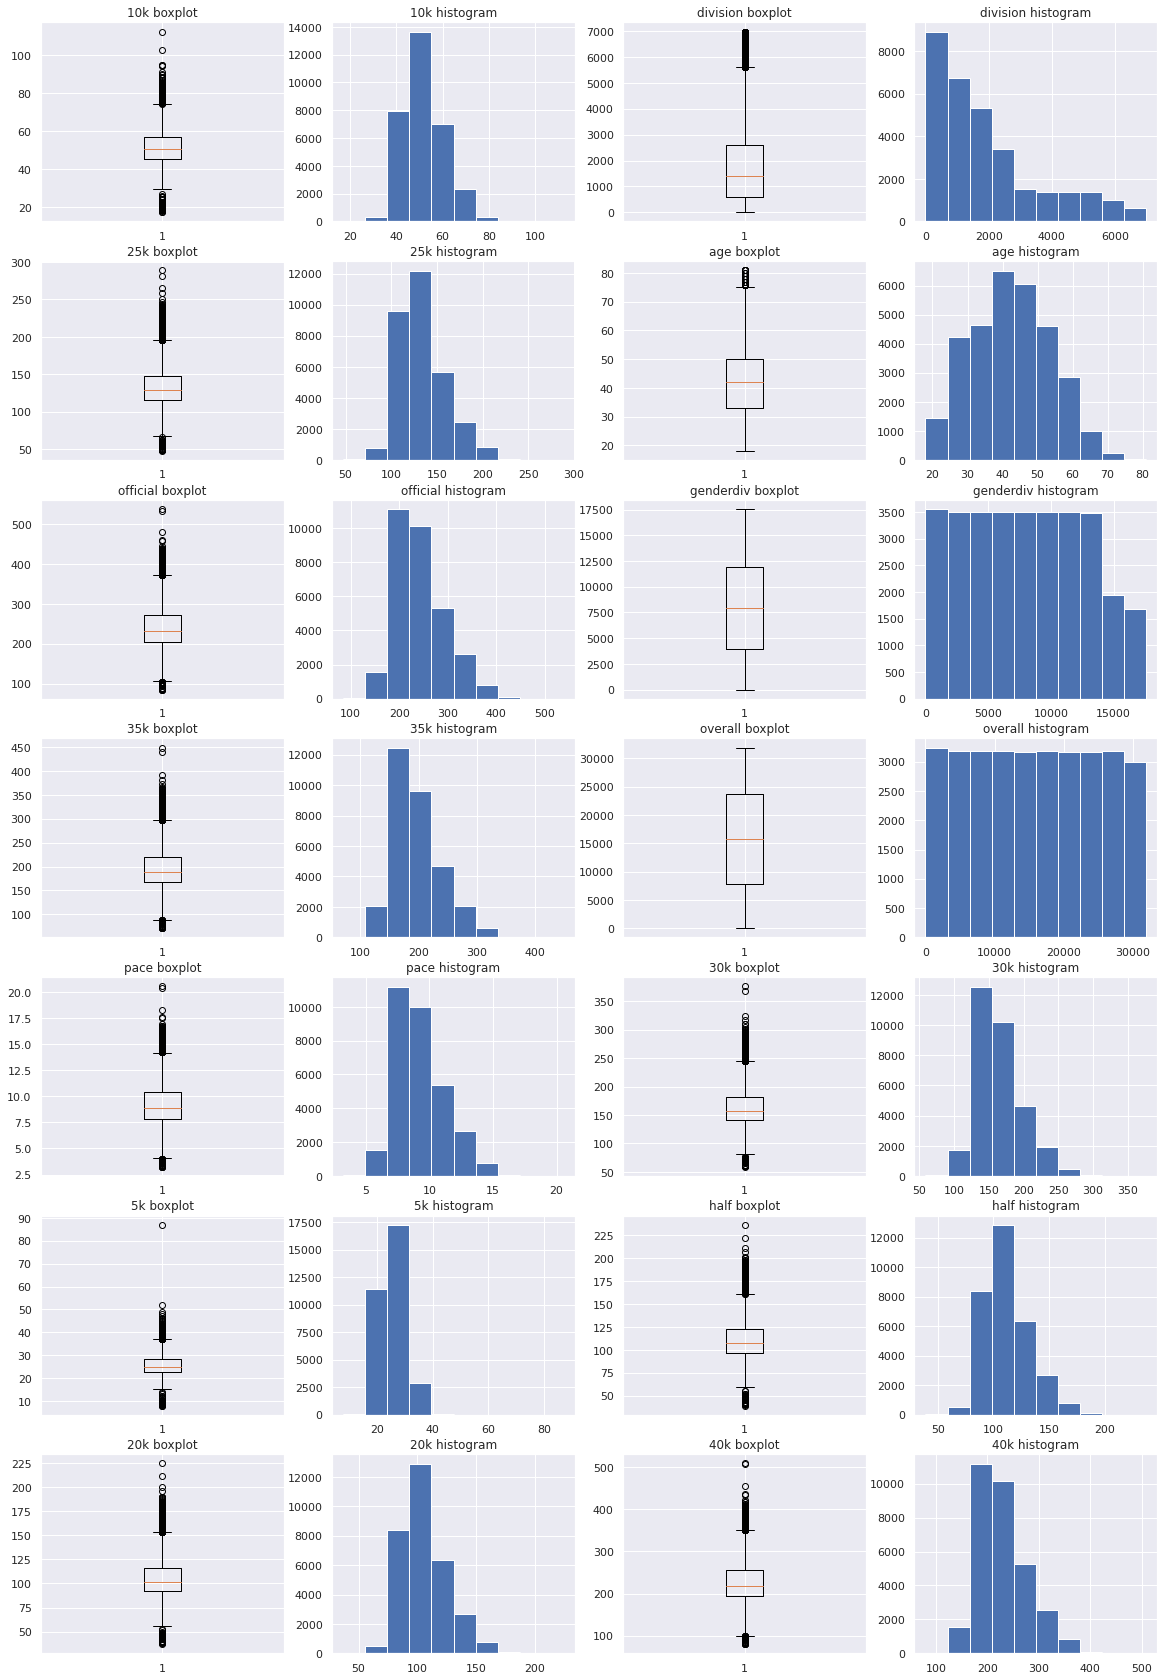

In [ ]:
# Plotting continuous variables (boxplots and histograms) to visualize the distribution and check for outliers
cont_vars = ['10k', 'division', '25k', 'age', 'official',
              'genderdiv', '35k', 'overall', 'pace', '30k', '5k', 'half',
              '20k', '40k']

plt.figure(figsize=(20,30))

i = 0
for column in cont_vars:
    i += 1
    plt.subplot(7, 4, i)
    plt.boxplot(results_2014[column])
    plt.title('{} boxplot'.format(column))
    i += 1
    plt.subplot(7, 4, i)
    plt.hist(results_2014[column])
    plt.title('{} histogram'.format(column))
plt.show()


In [ ]:
for column in cont_vars:
    print(column)
    q75, q25 = np.percentile(results_2014[column], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((results_2014[column] > max_val) | (results_2014[column] < min_val))[0])
    outlier_percent = round(outlier_count/len(results_2014[column])*100, 2)
    high_lim = outlier_count-len(np.where(results_2014[column] < min_val)[0])
    high_percent = round(high_lim/len(results_2014[column])*100, 2)
    #high_lim = outlier_count-len(np.where(results_2014[column] > min_val)[0])
    low_percent = round(outlier_percent - high_percent, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Outlier percentage: {}%'.format(outlier_percent))
    print('Lower limit: {}%'.format(low_percent))
    print('Higher limit: {}%'.format(high_percent))
    print(40*'-')

10k
Number of outliers: 389
Outlier percentage: 1.23%
Lower limit: 0.14%
Higher limit: 1.09%
----------------------------------------
division
Number of outliers: 1623
Outlier percentage: 5.13%
Lower limit: 0.0%
Higher limit: 5.13%
----------------------------------------
25k
Number of outliers: 740
Outlier percentage: 2.34%
Lower limit: 0.12%
Higher limit: 2.22%
----------------------------------------
age
Number of outliers: 35
Outlier percentage: 0.11%
Lower limit: 0.0%
Higher limit: 0.11%
----------------------------------------
official
Number of outliers: 519
Outlier percentage: 1.64%
Lower limit: 0.1%
Higher limit: 1.54%
----------------------------------------
genderdiv
Number of outliers: 0
Outlier percentage: 0.0%
Lower limit: 0.0%
Higher limit: 0.0%
----------------------------------------
35k
Number of outliers: 677
Outlier percentage: 2.14%
Lower limit: 0.1%
Higher limit: 2.04%
----------------------------------------
overall
Number of outliers: 0
Outlier percentage: 0.0%


In [ ]:
# Winsorization of the following:

results_2014['10k']       = winsorize(results_2014['10k'],(0.0015,0.011))
results_2014['division']  = winsorize(results_2014['division'],(0,0.052))
results_2014['25k']       = winsorize(results_2014['25k'],(0.0013,0.023))
results_2014['age']       = winsorize(results_2014['age'],(0,0.0012))
results_2014['official']  = winsorize(results_2014['official'],(0.0011,0.0155))
results_2014['35k']       = winsorize(results_2014['35k'],(0.0011,0.021))
results_2014['pace']      = winsorize(results_2014['pace'],(0.0013,0.0225))
results_2014['30k']       = winsorize(results_2014['30k'],(0.0013,0.0225))
results_2014['5k']        = winsorize(results_2014['5k'],(0.0015,0.009))
results_2014['half']      = winsorize(results_2014['half'],(0.14,0.02))
results_2014['20k']       = winsorize(results_2014['20k'],(0.0013,0.019))
results_2014['40k']       = winsorize(results_2014['40k'],(0.0011,0.017))

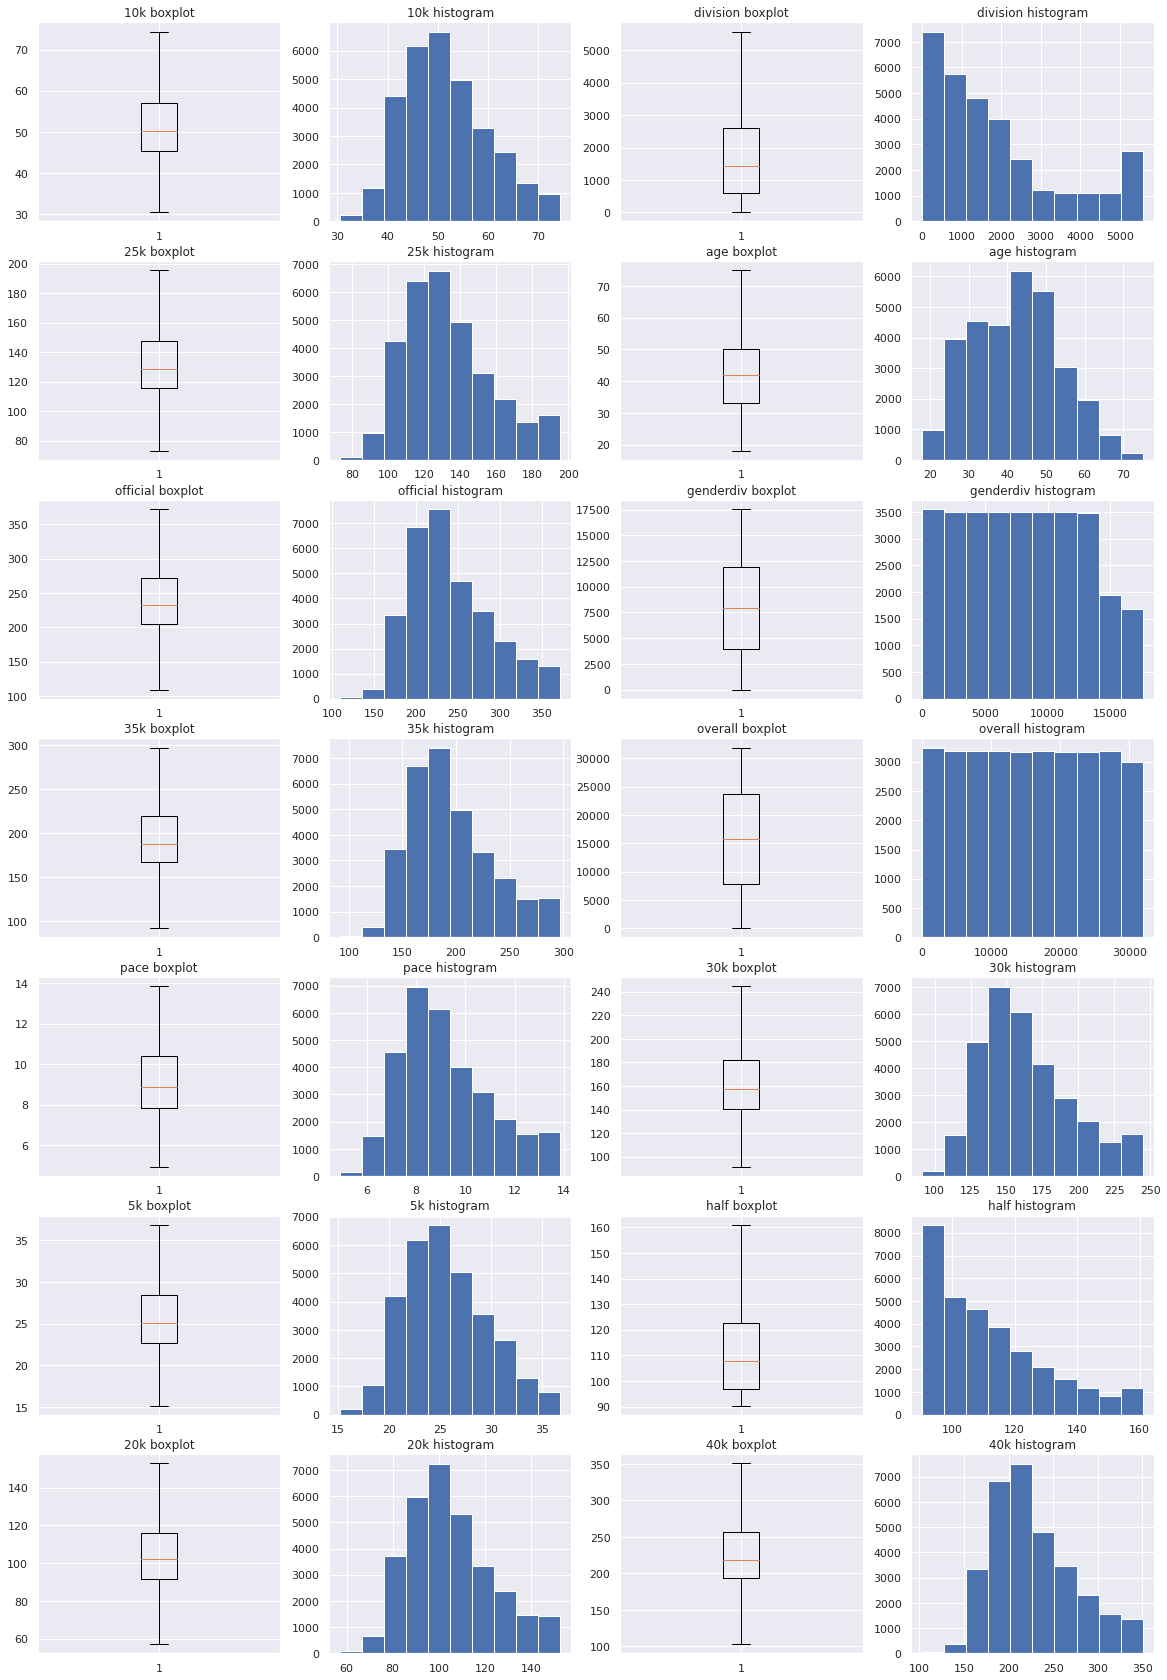

In [ ]:
# Plotting continuous variables (boxplots to make sure all outliers have been dealt with)
cont_vars = ['10k', 'division', '25k', 'age', 'official',
              'genderdiv', '35k', 'overall', 'pace', '30k', '5k', 'half',
              '20k', '40k']

plt.figure(figsize=(20,30))

i = 0
for column in cont_vars:
    i += 1
    plt.subplot(7, 4, i)
    plt.boxplot(results_2014[column])
    plt.title('{} boxplot'.format(column))
    i += 1
    plt.subplot(7, 4, i)
    plt.hist(results_2014[column])
    plt.title('{} histogram'.format(column))
plt.show()

**As you can see in all the above boxplots all outliers were removed and most of the variables seem to be normal.**

## **2.3 Data Exploration**

In [ ]:
# Descriptive Statistics (continuous variables)
results_2014.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.00000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000
mean,51.607809,1893.268774,133.360319,42.384134,241.727565,8005.19744,195.741631,15838.459766,9.221912,163.632310,25.671399,111.856375,105.189275,227.947502
std,8.524402,1630.849597,24.720346,11.290583,49.937120,4732.00560,39.729948,9179.650176,1.884996,31.862457,4.117395,18.588107,18.602211,47.134072
min,30.480000,1.000000,73.000000,18.000000,109.000000,1.00000,91.530000,1.000000,4.920000,91.370000,15.170000,90.370000,57.050000,103.030000
25%,45.370000,608.000000,115.450000,33.000000,205.320000,3943.75000,166.970000,7886.750000,7.830000,140.527500,22.620000,96.770000,91.680000,193.630000
50%,50.280000,1419.000000,128.870000,42.000000,232.000000,7921.00000,187.870000,15833.500000,8.850000,157.520000,25.070000,107.680000,102.010000,218.500000
75%,57.000000,2602.000000,147.700000,50.000000,272.205000,11894.00000,219.370000,23787.250000,10.380000,182.205000,28.400000,122.680000,116.150000,256.572500
max,74.370000,5582.000000,195.620000,75.000000,372.470000,17575.00000,297.400000,31931.000000,13.850000,244.650000,36.850000,160.980000,152.780000,350.570000


In [ ]:
# Descriptive Statistics (categorical variables)
results_2014.describe(include='O')

,gender,state,country
count,31640,31640,31640
unique,2,68,78
top,M,MA,USA
freq,17478,7807,26939


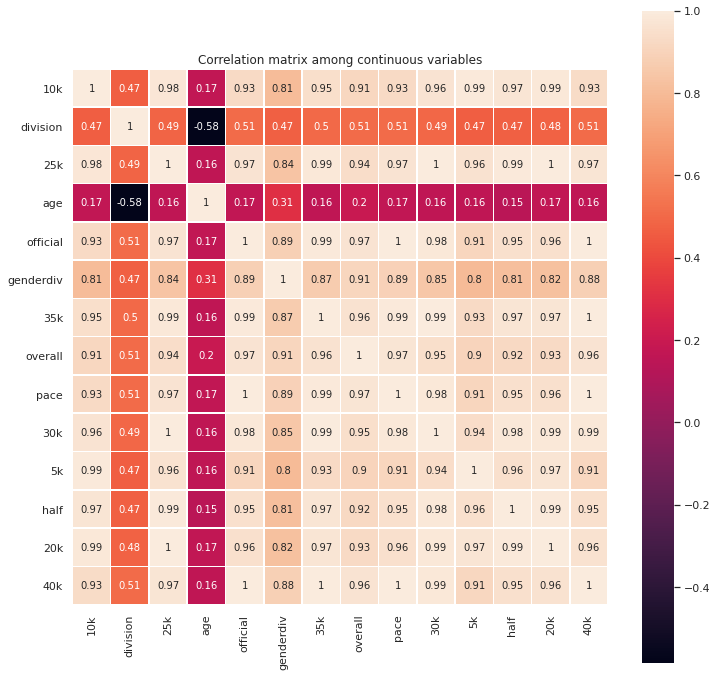

In [ ]:
# A heat map might show us some correlation between the continuous variables
sns.set()
cormat = results_2014.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title('Correlation matrix among continuous variables')
plt.show()

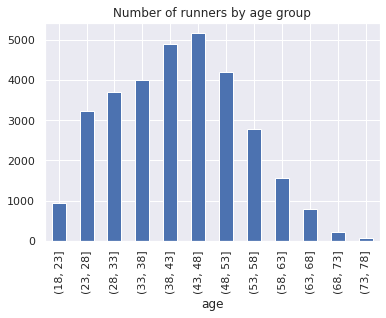

In [ ]:
results_2014['official'].groupby(pd.cut(results_2014['age'], range(18,80,5))).aggregate(len).plot(kind="bar", title="Number of runners by age group")

# **3. Feature Engineering**

---

In [ ]:
# Converting categorical data to dummy variables
results_2014 = pd.get_dummies(results_2014)
results_2014 = results_2014.dropna(axis=1)

## **3.1 PCA**

In [ ]:
from sklearn.preprocessing import normalize
# Normalize all data
results_2014_norm = normalize(results_2014)

Text(0, 0.5, 'cumulative explained variance')

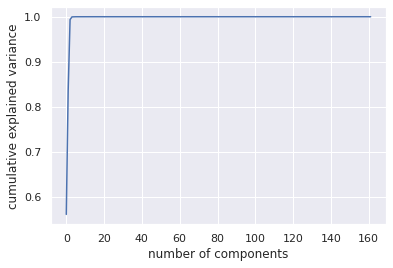

In [ ]:
# We will plot explained variance ratio and choose a number of components that "capture" at least 90% of the variance
from sklearn.decomposition import PCA

pca = PCA().fit(results_2014_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# We will get the PCA using 2 components as per the plot above (90% of variance)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(results_2014_norm)
pcaDf_test_norm = pd.DataFrame(data = principalComponents)

In [ ]:
pcaDf_test_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31640 entries, 0 to 31639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       31640 non-null  float64
 1   1       31640 non-null  float64
dtypes: float64(2)
memory usage: 494.5 KB


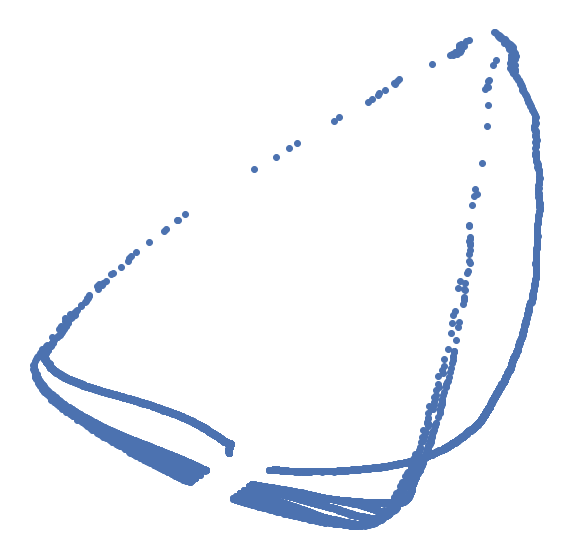

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(pcaDf_test_norm.iloc[:, 0], pcaDf_test_norm.iloc[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## **3.2 t-SNE**

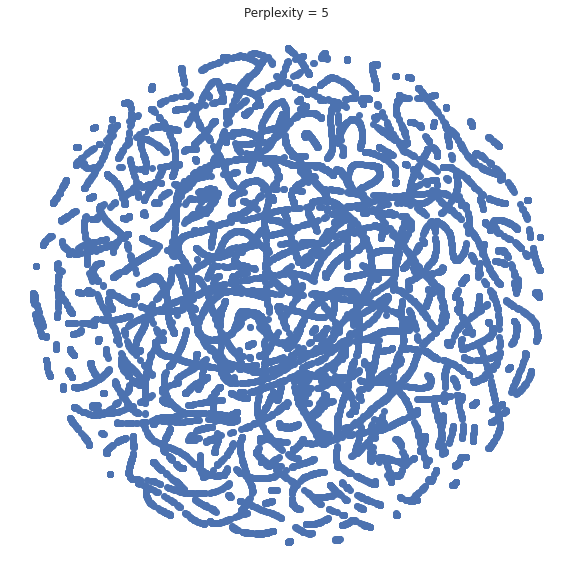

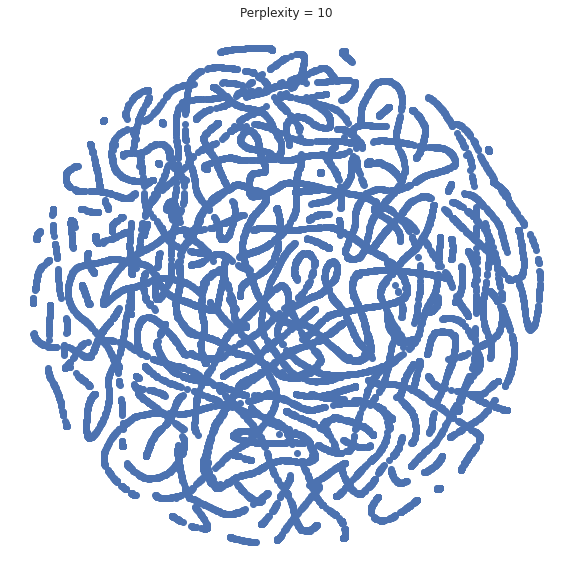

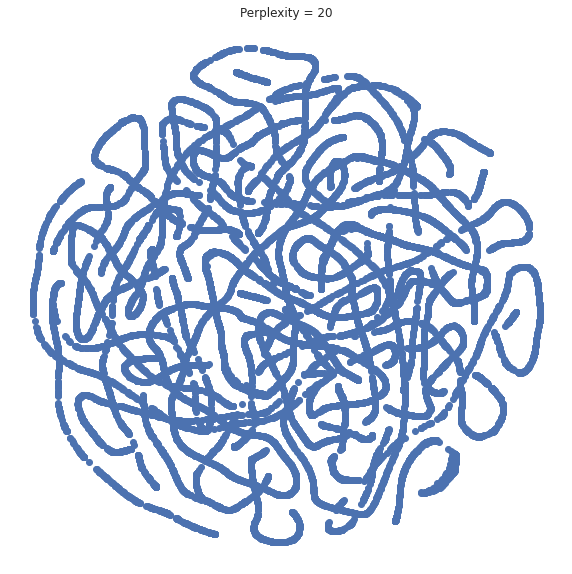

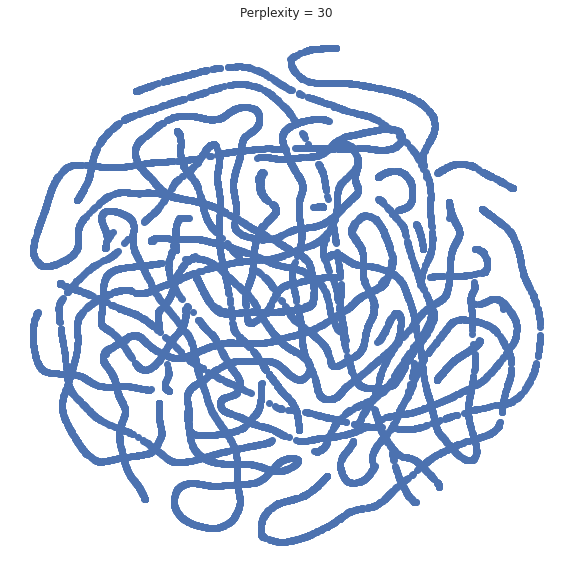

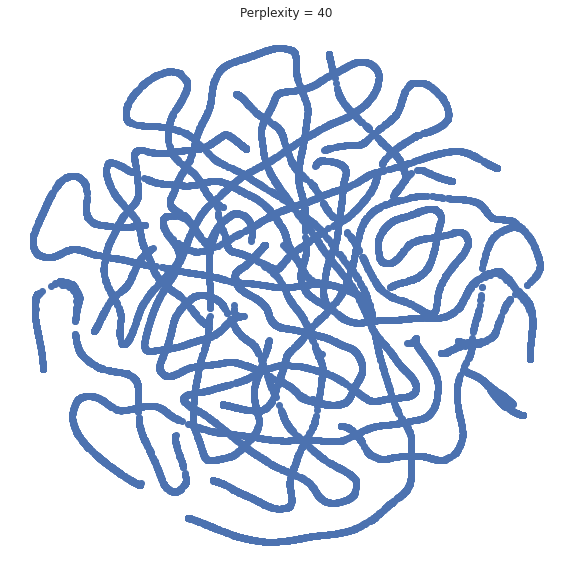

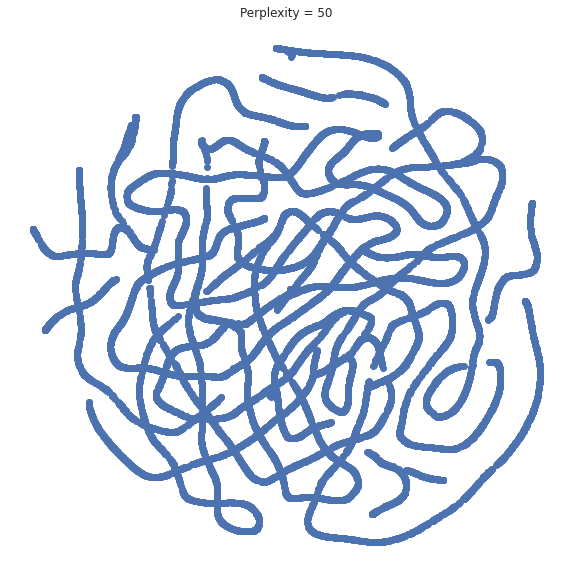

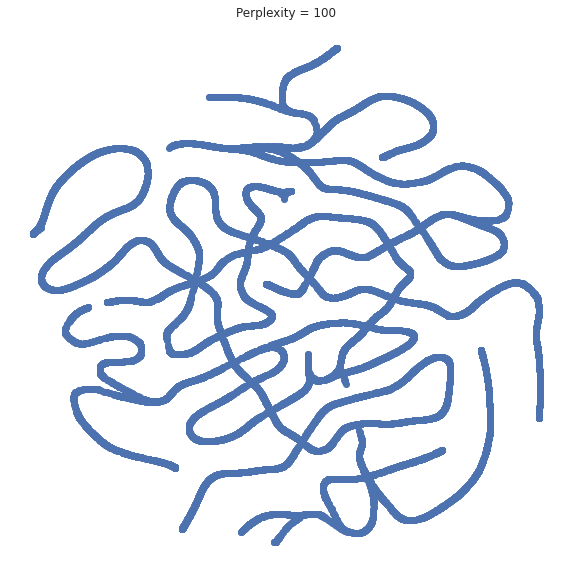

In [ ]:
from sklearn.manifold import TSNE

# Trying different values for the perplexity
perp = [5, 10, 20, 30, 40, 50, 100]

for i in perp:
    tsne = TSNE(n_components=2, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(results_2014_norm)

    plt.figure(figsize=(10,10))
    colours = 'rbgrg'
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('Perplexity = ' + str(i))
    plt.show()

**The t-SNE seems to show more detail with perplexity=100 compared to the other values and is still much better than PCA**

# **4. Clustering**

---

### Before applying the clustering algorithms I have to tune some of the hyper parameters within the K-means and the GMM algorithms that we will be using. First, we will run the K-means algorithm using PCA and t_SNE with a range of n_clusters to determine the best case based on the Silhouette score. Next, we will repeat the process using GMM instead.

## **4.1 K-means using PCA**

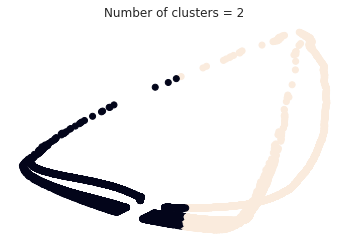

Silhouette score for 2 cluster k-means using PCA: 0.4553645799885564


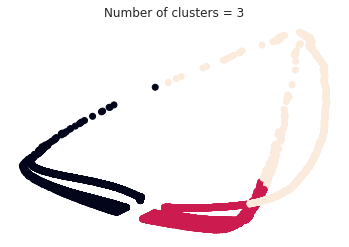

Silhouette score for 3 cluster k-means using PCA: 0.4795954917960324


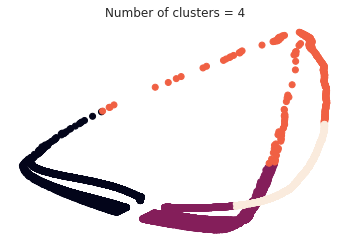

Silhouette score for 4 cluster k-means using PCA: 0.49626760664136443


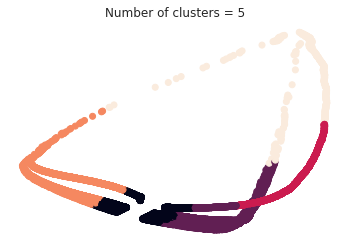

Silhouette score for 5 cluster k-means using PCA: 0.3996070204102993


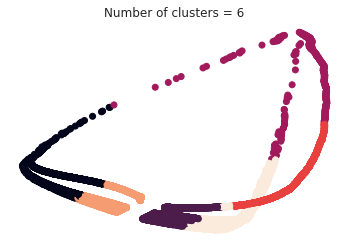

Silhouette score for 6 cluster k-means using PCA: 0.45306404219570107


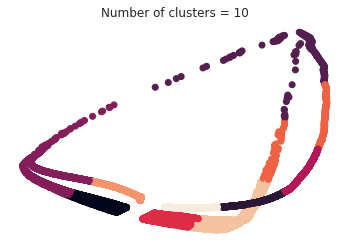

Silhouette score for 10 cluster k-means using PCA: 0.5390063744598247


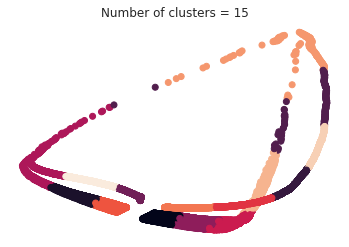

Silhouette score for 15 cluster k-means using PCA: 0.5410424813320499


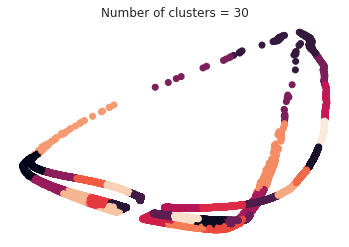

Silhouette score for 30 cluster k-means using PCA: 0.5035586568802749


In [ ]:
cluster_numbers = [2, 3, 4, 5, 6, 10, 15, 30]
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    k_means.fit(results_2014_norm)
    K_cluster = k_means.predict(results_2014_norm)

    pca = PCA(n_components=2).fit_transform(results_2014_norm)

    plt.scatter(pca[:,0], pca[:,1], c=K_cluster)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('Number of clusters = ' + str(i))
    plt.show()

    print('Silhouette score for {} cluster k-means using PCA: {}'.format((i),
    metrics.silhouette_score(results_2014_norm, K_cluster, metric='euclidean')))

## **4.2 K-means using t-SNE**

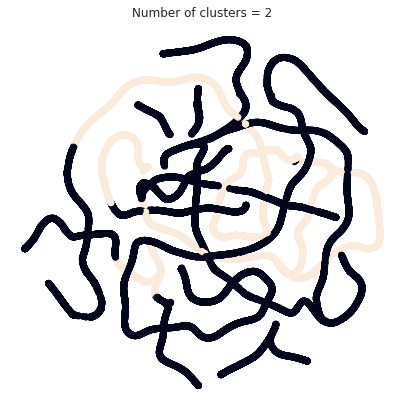

Silhouette score for 2 cluster k-means using t-SNE: 0.4553645799885564


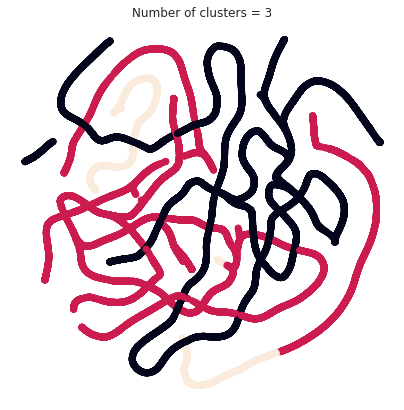

Silhouette score for 3 cluster k-means using t-SNE: 0.4795954917960324


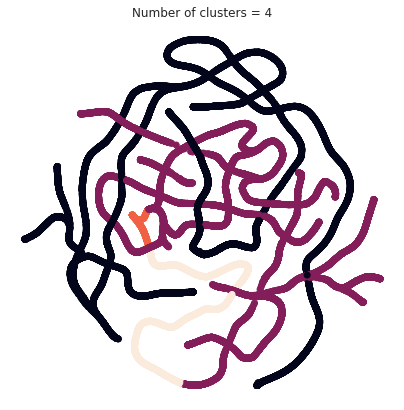

Silhouette score for 4 cluster k-means using t-SNE: 0.49626760664136443


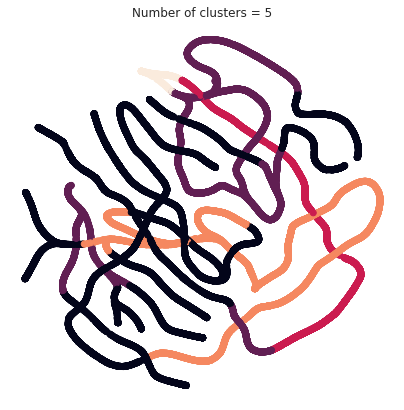

Silhouette score for 5 cluster k-means using t-SNE: 0.3996070204102993


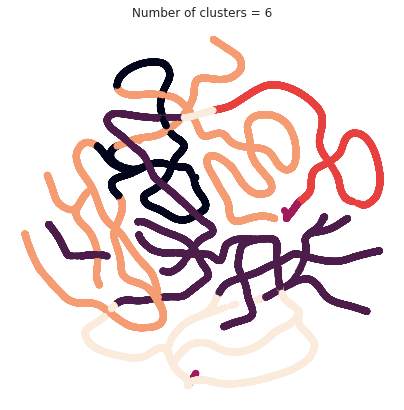

Silhouette score for 6 cluster k-means using t-SNE: 0.45306404219570107


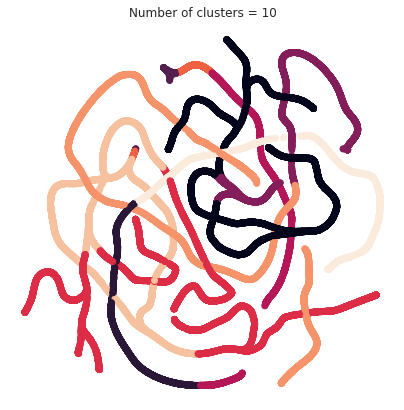

Silhouette score for 10 cluster k-means using t-SNE: 0.5390063744598247


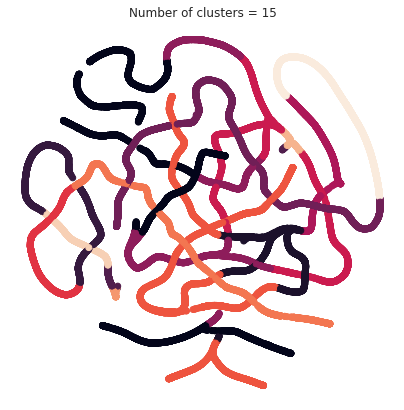

Silhouette score for 15 cluster k-means using t-SNE: 0.5410424813320499


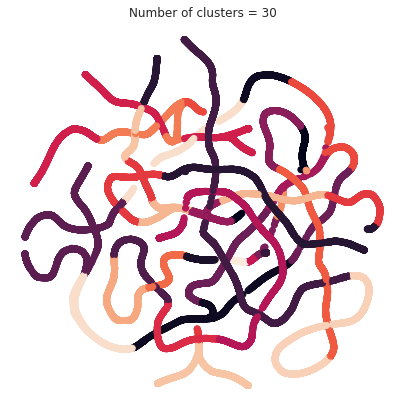

Silhouette score for 30 cluster k-means using t-SNE: 0.5035586568802749


In [ ]:
t_cluster_numbers = [2, 3, 4, 5, 6, 10, 15, 30]
for i in t_cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters = k_means.fit_predict(results_2014_norm)

    tsne = TSNE(n_components=2, perplexity=100, n_iter=300)
    tsne_results = tsne.fit_transform(results_2014_norm)

    plt.figure(figsize=(7,7))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
             c=kmeans_clusters)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('Number of clusters = ' + str(i))
    plt.show()

    print('Silhouette score for {} cluster k-means using t-SNE: {}'.format((i),
    metrics.silhouette_score(results_2014_norm, kmeans_clusters, metric='euclidean')))

## **4.3 GMM using PCA**

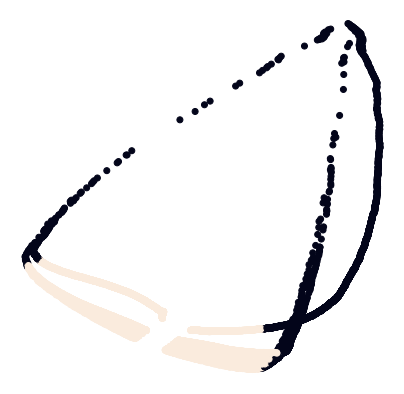

Silhouette score for GMM using PCA with 2 n_components=0.5072319570362092


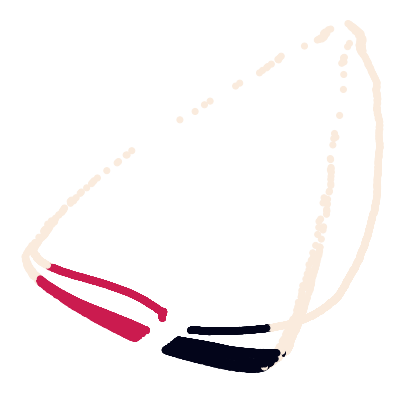

Silhouette score for GMM using PCA with 3 n_components=0.41843155998643783


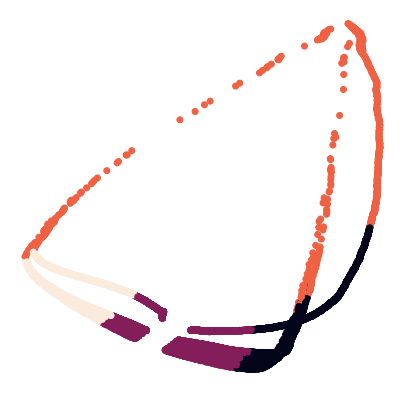

Silhouette score for GMM using PCA with 4 n_components=0.3733859605574354


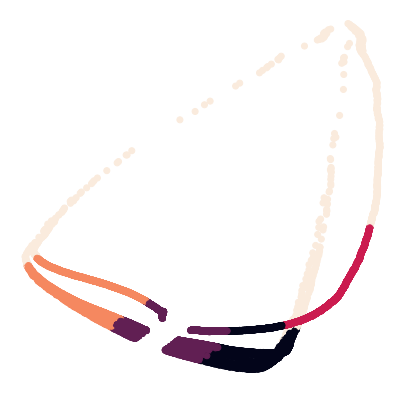

Silhouette score for GMM using PCA with 5 n_components=0.3807340256732547


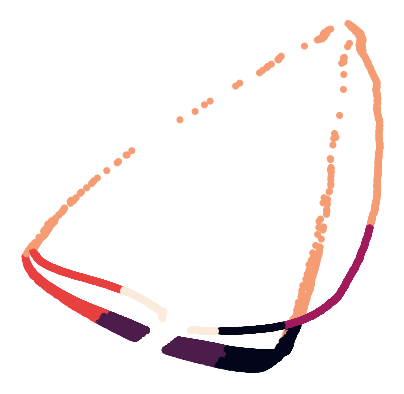

Silhouette score for GMM using PCA with 6 n_components=0.41457959738854744


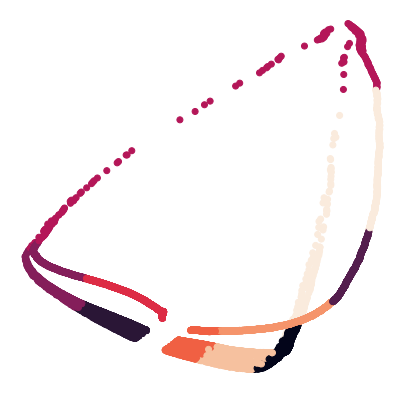

Silhouette score for GMM using PCA with 10 n_components=0.46674474519190595


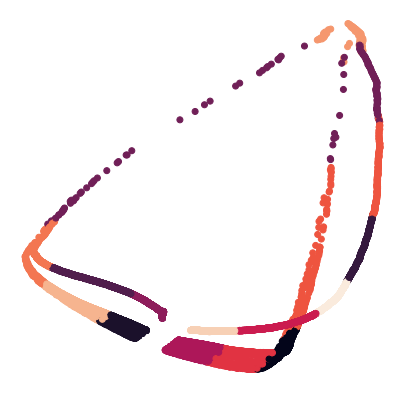

Silhouette score for GMM using PCA with 15 n_components=0.5152321928324375


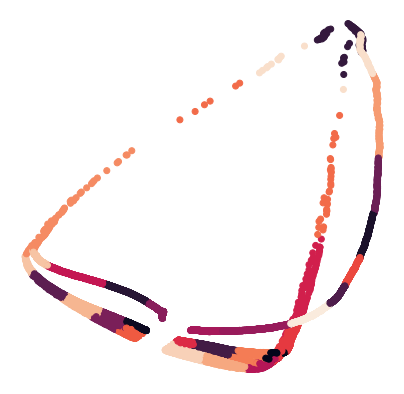

Silhouette score for GMM using PCA with 30 n_components=0.473853101633346


In [ ]:
components = [2, 3, 4, 5, 6, 10, 15, 30]
for i in components:
    # Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=i, random_state=100)

    # Fit model
    clusters = gmm_cluster.fit_predict(results_2014_norm)

    pca = PCA(n_components=2).fit_transform(results_2014_norm)

    plt.figure(figsize=(7,7))
    plt.scatter(pca[:, 0], pca[:, 1], c=clusters)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

    print('Silhouette score for GMM using PCA with {} n_components={}'.format((i),
    metrics.silhouette_score(results_2014_norm, clusters, metric='euclidean')))

## **4.4 GMM using t-SNE**

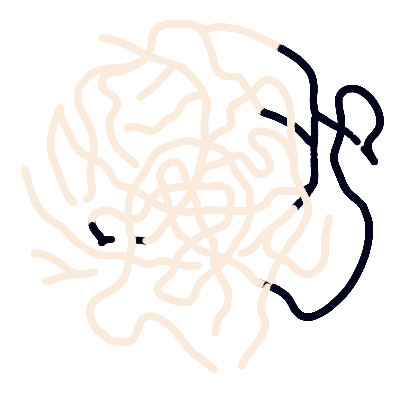

Silhouette score for GMM using t-SNE with 2 n_components=0.5072319570362092


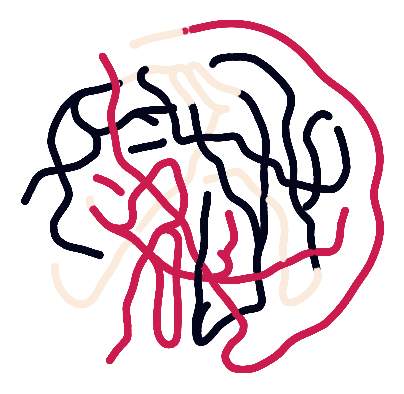

Silhouette score for GMM using t-SNE with 3 n_components=0.41843155998643783


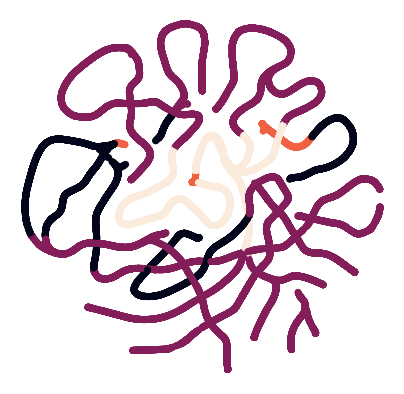

Silhouette score for GMM using t-SNE with 4 n_components=0.3733859605574354


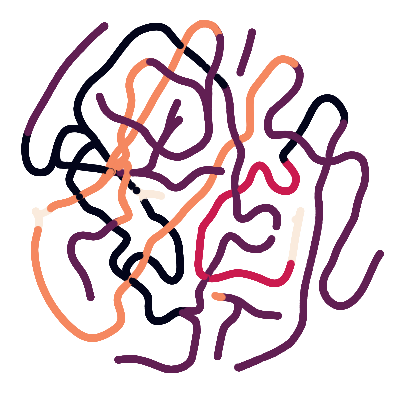

Silhouette score for GMM using t-SNE with 5 n_components=0.3807340256732547


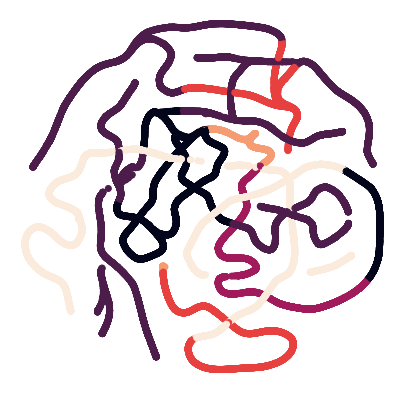

Silhouette score for GMM using t-SNE with 6 n_components=0.41457959738854744


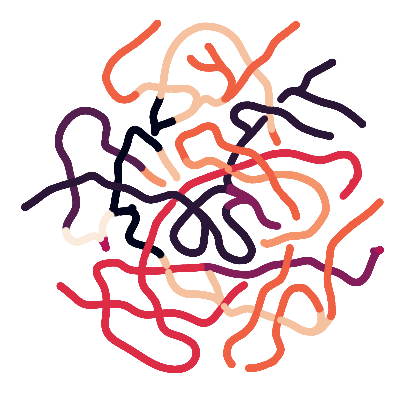

Silhouette score for GMM using t-SNE with 10 n_components=0.46674474519190595


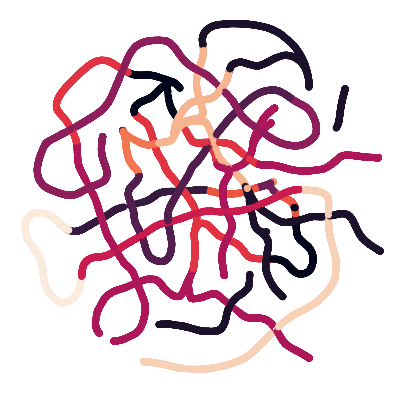

Silhouette score for GMM using t-SNE with 15 n_components=0.5152321928324375


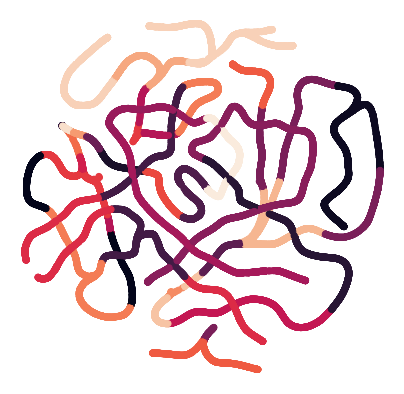

Silhouette score for GMM using t-SNE with 30 n_components=0.473853101633346


In [ ]:
components = [2, 3, 4, 5, 6, 10, 15, 30]
for i in components:
    # Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=i, random_state=100)

    # Fit model
    clusters = gmm_cluster.fit_predict(results_2014_norm)

    tsne = TSNE(n_components=2, perplexity=100, n_iter=300)
    tsne_results = tsne.fit_transform(results_2014_norm)

    plt.figure(figsize=(7,7))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

    print('Silhouette score for GMM using t-SNE with {} n_components={}'.format((i),
    metrics.silhouette_score(results_2014_norm, clusters, metric='euclidean')))

# **5. Summary**

---

### I attempted to cluster a dataset of 31,984 runners who participated in the Boston marathon in 2014. After cleaning the data and finishing the EDA, I first normalized the dataset to scale the features. Next, I applied PCA and t-SNE in order to reduce the number of dimensions/features for visualization and ease the clustering process. I were able to obtain a silhouette score of 0.541 from 2 instances.

### Next, I attempted fine-tuning the hyper parameters in both K-means and GMM. I tried different values for n_clusters in K-means and n_components in GMM. I got the best results according to the silhouette score from the 15 cluster k-means using t-SNE and 15 cluster k-means using PCA.

### It would seem GMM is not the optimal clustering algorithm for this particular dataset. I believe trying a broader range for the number of clusters or maybe GridSearchCV might provide different results maybe better but that would require more computational power and time.